# Fish Classification

## 1. Importing Necessary Libraries

In [4]:
# utilities
import numpy as np # linear algebra
import pandas as pd # data processing
import pickle
import random
import os

# visualization
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle

# tensorflow
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization

from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ignoring warnings
import warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'

print(os.listdir("../input"))

['d', 'a-large-scale-fish-dataset']


## 2. Preprocessing

### Function that reads the images to numpy arrays

In [5]:
def img_to_array(path, category_no, X, y):
    for p in os.listdir(path):
        img = cv2.imread(os.path.join(path, p), cv2.IMREAD_GRAYSCALE)
        img_np = cv2.resize(img, dsize = (224, 224))
        X.append(img_np)
        y.append(category_no)

### Reading images

In [6]:
path = "/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/"

category_list = ["Black Sea Sprat", "Gilt-Head Bream", "Hourse Mackerel", "Red Mullet", "Red Sea Bream", "Sea Bass", "Shrimp", "Striped Red Mullet", "Trout"]

X = []
y = []

for i in range(len(category_list)):
    img_to_array(path + category_list[i] + "/" + category_list[i], i, X, y)

X = np.array(X).reshape(-1,224,224,1)
y = np.array(y)

### Let's look at their shapes

In [7]:
X.shape, y.shape

((9000, 224, 224, 1), (9000,))

### Let's look at some images

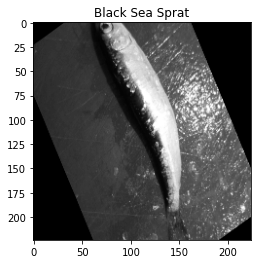

In [8]:
plt.imshow(X[0], cmap = "gray")
plt.title(category_list[y[0]]);

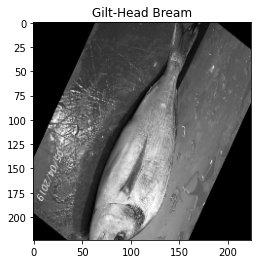

In [9]:
plt.imshow(X[1000], cmap = "gray")
plt.title(category_list[y[1000]]);

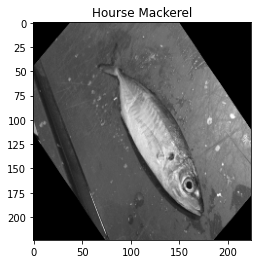

In [10]:
plt.imshow(X[2000], cmap = "gray")
plt.title(category_list[y[2000]]);

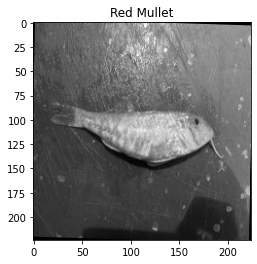

In [11]:
plt.imshow(X[3000], cmap = "gray")
plt.title(category_list[y[3000]]);

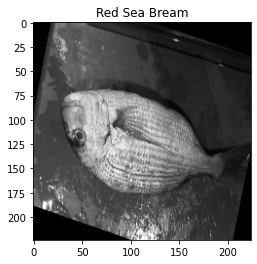

In [12]:
plt.imshow(X[4000], cmap = "gray")
plt.title(category_list[y[4000]]);

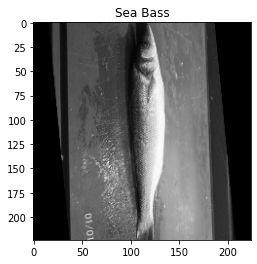

In [13]:
plt.imshow(X[5000], cmap = "gray")
plt.title(category_list[y[5000]]);

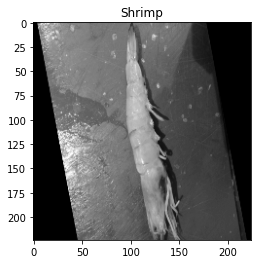

In [14]:
plt.imshow(X[6000], cmap = "gray")
plt.title(category_list[y[6000]]);

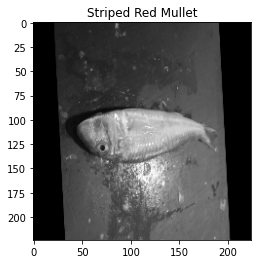

In [15]:
plt.imshow(X[7000], cmap = "gray")
plt.title(category_list[y[7000]]);

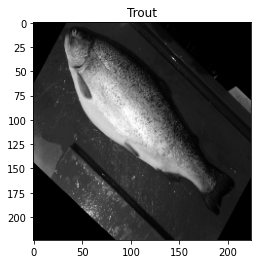

In [16]:
plt.imshow(X[8000], cmap = "gray")
plt.title(category_list[y[8000]]);

### Let's visualize the number of classes

<AxesSubplot:ylabel='count'>

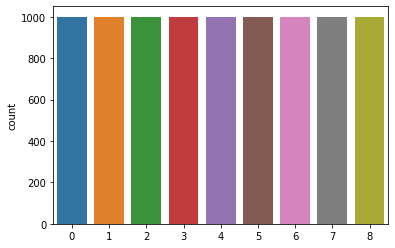

In [17]:
sns.countplot(y)

#### The data is balanced, so we are ready to go.

### Normalizing


#### Here we normalize the data so it converges faster to global minima.

In [18]:
X = X / 255

### First we should shuffle the data because the data is ordered

#### We first turn our 3D numpy array to 2D numpy array

In [19]:
X = np.array(X).reshape(-1,224*224,)

#### Let's check its shape

In [20]:
X.shape

(9000, 50176)

#### Then we create a dataframe with X_train and y_train because we want to shuffle the data

In [21]:
df = pd.DataFrame(X)
df["target"] = y

#### We are shuffling the data randomly

In [22]:
df = df.sample(frac = 1)

#### After we want to turn the dataframe to y_train and X_train, their old status

In [23]:
y = df["target"].to_numpy()
del df["target"]
X = df.to_numpy()

In [24]:
del df

#### Let's check their shape

In [25]:
X.shape, y.shape

((9000, 50176), (9000,))

#### Then we turn the 2D array to 3D array

In [26]:
X = np.array(X).reshape(-1,224,224,1)

#### Let's check its shape

In [27]:
X.shape, y.shape

((9000, 224, 224, 1), (9000,))

### We should split the data to train, validation and test sets

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)

In [29]:
del X

In [30]:
del y

## 3. Modeling and Predicting

### Here we are constructing our CNN layers. We use Conv2D, MaxPooling2D, Dropout, Flatten and Dense layers.

In [31]:
model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(224,224,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(9, activation='softmax')
])

2021-09-18 23:14:46.726009: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-09-18 23:14:46.768384: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-18 23:14:46.769128: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-09-18 23:14:46.769206: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-09-18 23:14:46.795844: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2021-09-18 23:14:46.795994: I tensorflow/stream_executor/plat

### Here we set compiler configurations.

In [32]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

### Here we save the history of fitting the data.

In [33]:
history = model.fit(X_train, y_train, batch_size = 256, epochs = 20, verbose = 1, validation_data = (X_val, y_val))

2021-09-18 23:14:49.180447: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1264435200 exceeds 10% of free system memory.
2021-09-18 23:14:50.243670: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/20


2021-09-18 23:14:50.965844: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2021-09-18 23:14:51.814223: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2021-09-18 23:14:51.852017: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


25/25 [==============================] - 18s 377ms/step - loss: 2.1704 - accuracy: 0.1421 - val_loss: 1.7633 - val_accuracy: 0.3415
Epoch 2/20
25/25 [==============================] - 7s 279ms/step - loss: 1.6792 - accuracy: 0.3833 - val_loss: 1.2623 - val_accuracy: 0.5667
Epoch 3/20
25/25 [==============================] - 7s 278ms/step - loss: 1.2228 - accuracy: 0.5655 - val_loss: 0.9365 - val_accuracy: 0.6785
Epoch 4/20
25/25 [==============================] - 7s 281ms/step - loss: 0.9010 - accuracy: 0.6921 - val_loss: 0.7633 - val_accuracy: 0.7385
Epoch 5/20
25/25 [==============================] - 7s 276ms/step - loss: 0.7571 - accuracy: 0.7314 - val_loss: 0.6660 - val_accuracy: 0.7570
Epoch 6/20
25/25 [==============================] - 7s 276ms/step - loss: 0.5479 - accuracy: 0.8125 - val_loss: 0.5032 - val_accuracy: 0.8326
Epoch 7/20
25/25 [==============================] - 7s 283ms/step - loss: 0.3870 - accuracy: 0.8755 - val_loss: 0.3664 - val_accuracy: 0.8778
Epoch 8/20
25/25

### Let's see the accuracy

In [34]:
_, accuracy = model.evaluate(X_test, y_test)
print("Accuracy: %.2f" % (accuracy*100))

43/43 [==============================] - 1s 15ms/step - loss: 0.1501 - accuracy: 0.9667
Accuracy: 96.67


### Let's visualize model accuracy and model loss.

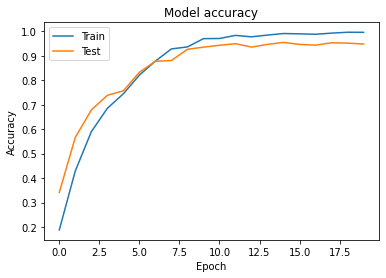

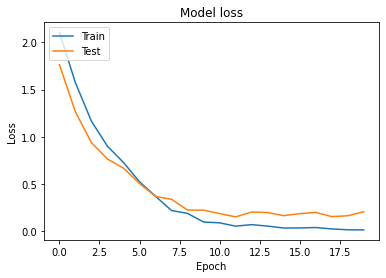

In [35]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
plt.show()

### Let's see the confusion matrix.

<AxesSubplot:>

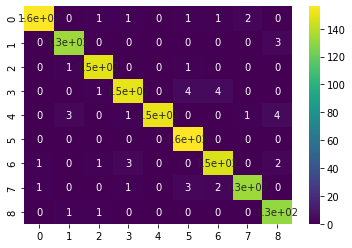

In [36]:
sns.heatmap(confusion_matrix(model.predict_classes(X_test), y_test), cmap = "viridis", annot = True)

### We achieved 96.67% accuracy